Loading Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

#PLOTLY
import plotly
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
from plotly.graph_objs import Scatter, Figure, Layout
cf.set_config_file(offline=True)

# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [5]:
data = pd.read_csv('/content/yellow_tripdata_2020-04.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [96]:
data_1 = pd.read_csv('/content/taxi+_zone_lookup.csv')

In [38]:
%%time
data = pd.read_csv('/content/yellow_tripdata_2020-04.csv')

CPU times: user 430 ms, sys: 67.5 ms, total: 497 ms
Wall time: 500 ms


<string>:2: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [40]:
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [41]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2.0,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0
1,1.0,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1.0,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0
2,1.0,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
3,1.0,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
4,2.0,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1.0,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5


In [123]:
print(len(data_1))
data_1.head()

265


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [7]:
data.isnull().sum()

VendorID                 19513
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          19513
trip_distance                0
RatecodeID               19513
store_and_fwd_flag       19513
PULocationID                 0
DOLocationID                 0
payment_type             19513
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

Looking at the missing values, I realize that the missing values are by error.

In this instance I prefer to remove the missing values then imputing a value.

In [8]:
data = data.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Fare Amount')

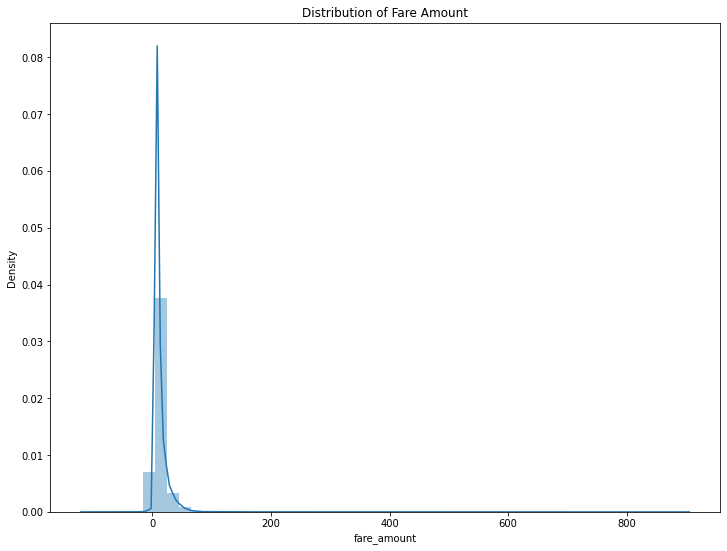

In [42]:
sns.distplot(data['fare_amount'])

plt.title('Distribution of Fare Amount')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Looking for Outliers with a Boxplot')

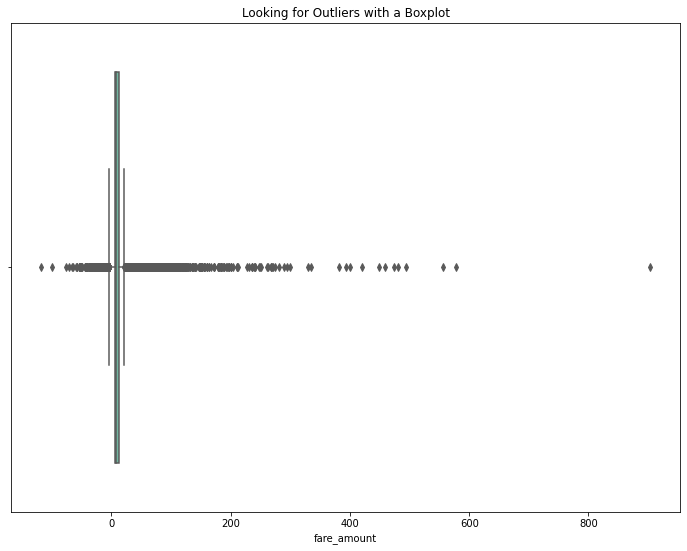

In [11]:
sns.boxplot(data['fare_amount'], palette="Set2" )

plt.title('Looking for Outliers with a Boxplot')

### Manipulation

Doing some research on our dataset, there's a few things that we can point out.

- Cab fares begin at $2.50 regardless of distance
- The location we are focusing on is NYC greater area, so we our coordinates are bounded in near (-70, 40) coordinates. I acknowledge this so I removed any instance were my dataset had 0 for latitude or longitude
- Usually a taxi doesn't pick you up in the same location that they drop you off, so I removed instances that had the same pickup and dropoff location
- I removed the outliers from fare amount

In [20]:
# Cab rides should not have negative numbers, along with that, taxi standarad fares begin at $5.50
data = data[data['fare_amount'] > 5.5]

In [12]:
mean = np.mean(data['fare_amount'])
sd = np.std(data['fare_amount'])    
data = data[(data['fare_amount'] > mean - 3*sd) & (data['fare_amount'] < mean + 3*sd)]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214517 entries, 0 to 218479
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               214517 non-null  float64
 1   tpep_pickup_datetime   214517 non-null  object 
 2   tpep_dropoff_datetime  214517 non-null  object 
 3   passenger_count        214517 non-null  float64
 4   trip_distance          214517 non-null  float64
 5   RatecodeID             214517 non-null  float64
 6   store_and_fwd_flag     214517 non-null  object 
 7   PULocationID           214517 non-null  int64  
 8   DOLocationID           214517 non-null  int64  
 9   payment_type           214517 non-null  float64
 10  fare_amount            214517 non-null  float64
 11  extra                  214517 non-null  float64
 12  mta_tax                214517 non-null  float64
 13  tip_amount             214517 non-null  float64
 14  tolls_amount           214517 non-nu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Fare Amount after removing outliers')

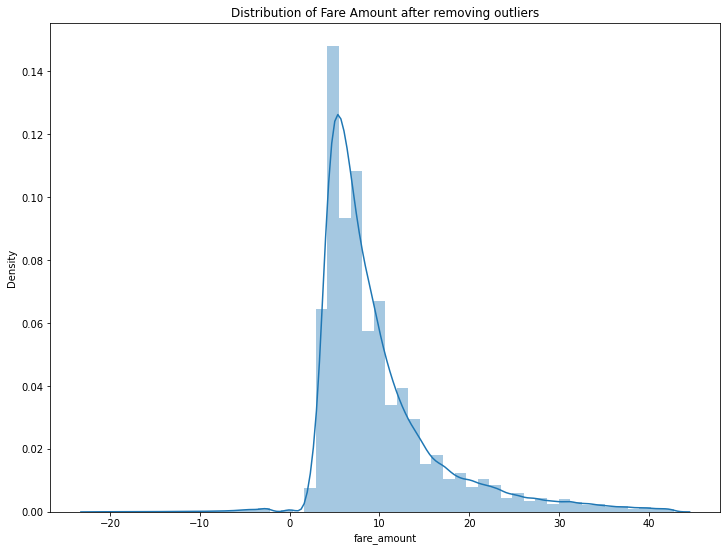

In [14]:
sns.distplot(data['fare_amount'])

plt.title('Distribution of Fare Amount after removing outliers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



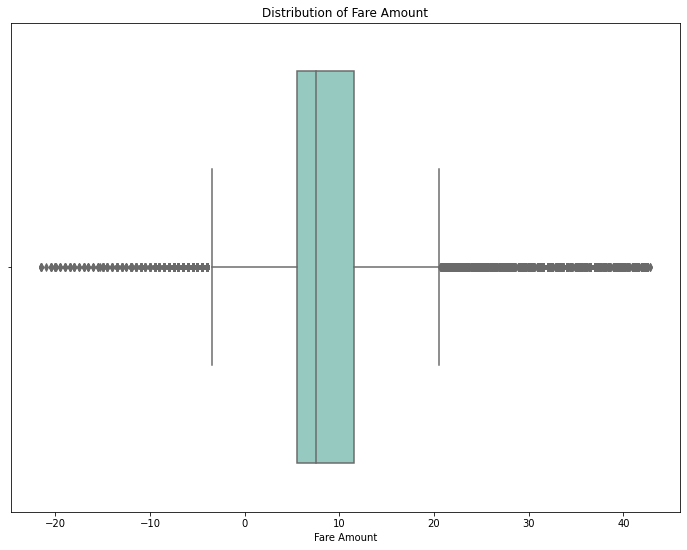

In [15]:
sns.boxplot(data['fare_amount'], palette="Set3" )
plt.xlabel('Fare Amount')
plt.title('Distribution of Fare Amount')
plt.show()

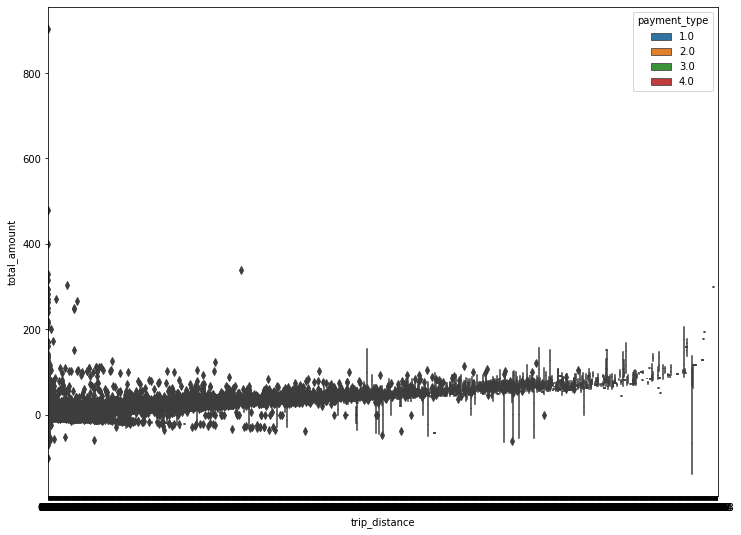

In [49]:
sns.boxplot(x="trip_distance", y="total_amount", hue="payment_type", data=data)

### Exploratory Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



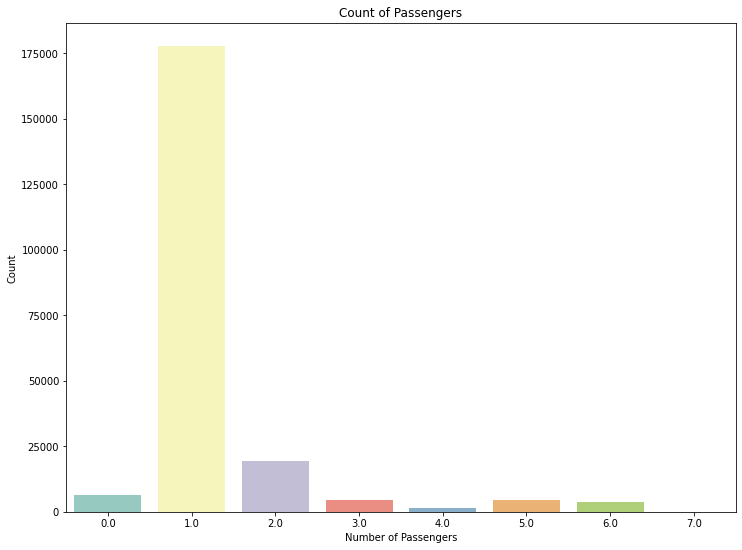

In [43]:
passenger_count = data.groupby(['passenger_count']).count()

sns.barplot(passenger_count.index, passenger_count['VendorID'], palette = "Set3")

plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')
plt.show()

# Maximum amount of passengers in a car should be 1, but the occurance of 7 passenger is by far too low to include


In [44]:
data = data[(data['passenger_count'] < 7) & (data['passenger_count'] > 0)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



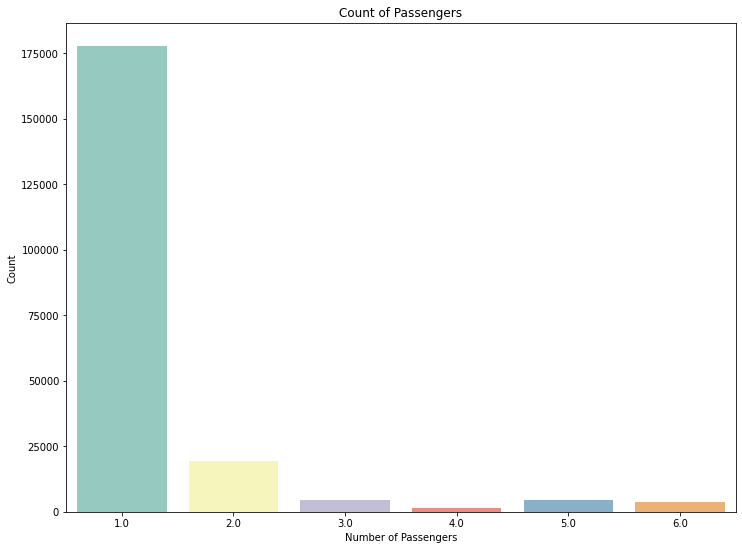

In [47]:
passenger = data.groupby(['passenger_count']).count()

sns.barplot(passenger.index, passenger['VendorID'], palette = "Set3")

plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



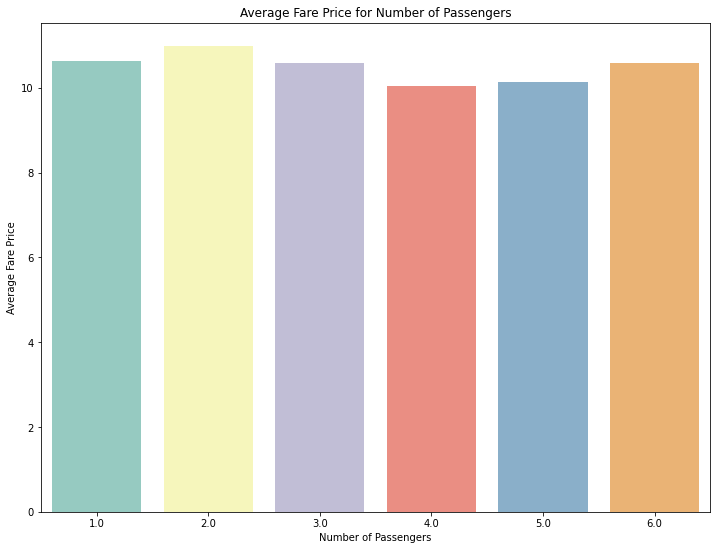

In [45]:
passenger_fare = data.groupby(['passenger_count']).mean()

sns.barplot(passenger_fare.index, passenger_fare['fare_amount'], palette = "Set3")

plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

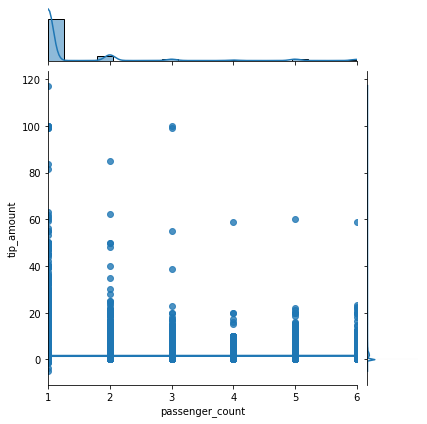

In [51]:
sns.jointplot(x="passenger_count", y="tip_amount", data=data, kind="reg")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0302eb0d0>,
      dtype=object)

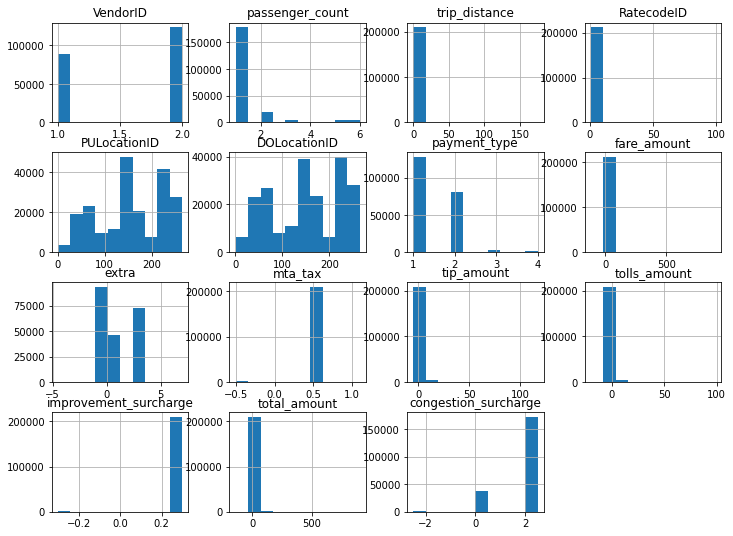

In [52]:
data.hist()

#Tip_amount vs Passenger_count 

To see whether more than one passenger gave more tip amount


#from the below graph we see when passenger count is 1 more tip_amount is given, also the highest tip amount is when passenger count is 1

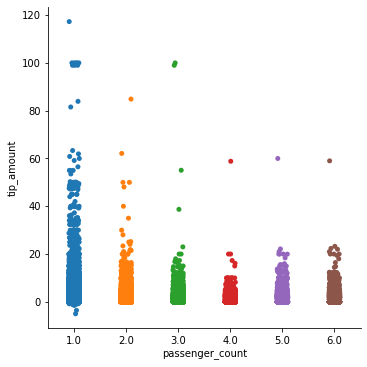

In [53]:
sns.catplot(x='passenger_count', y='tip_amount',data=data)

In [86]:
def date_columns(data):
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], yearfirst=True)
    data['year'] = data['tpep_pickup_datetime'].dt.year
    data['month'] = data['tpep_pickup_datetime'].dt.month
    data['day'] = data['tpep_pickup_datetime'].dt.day
    data['weekday'] = data['tpep_pickup_datetime'].dt.weekday
    data['hour'] = data['tpep_pickup_datetime'].dt.hour

In [87]:
data['day_of_week'] = data['tpep_pickup_datetime'].dt.day_name()

In [88]:
date_columns(data)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211897 entries, 0 to 218479
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               211897 non-null  datetime64[ns]
 1   tpep_pickup_datetime   211897 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  211897 non-null  object        
 3   passenger_count        211897 non-null  float64       
 4   trip_distance          211897 non-null  float64       
 5   RatecodeID             211897 non-null  float64       
 6   store_and_fwd_flag     211897 non-null  object        
 7   PULocationID           211897 non-null  int64         
 8   DOLocationID           211897 non-null  int64         
 9   payment_type           211897 non-null  float64       
 10  fare_amount            211897 non-null  float64       
 11  extra                  211897 non-null  float64       
 12  mta_tax                211897 non-null  floa

In [98]:
df = date_columns(data)

#Extracting frequency of passeneger in a cab into 2 lists - index and respective counts
#Plotting the counts and setting the corresponding xticks as the index 

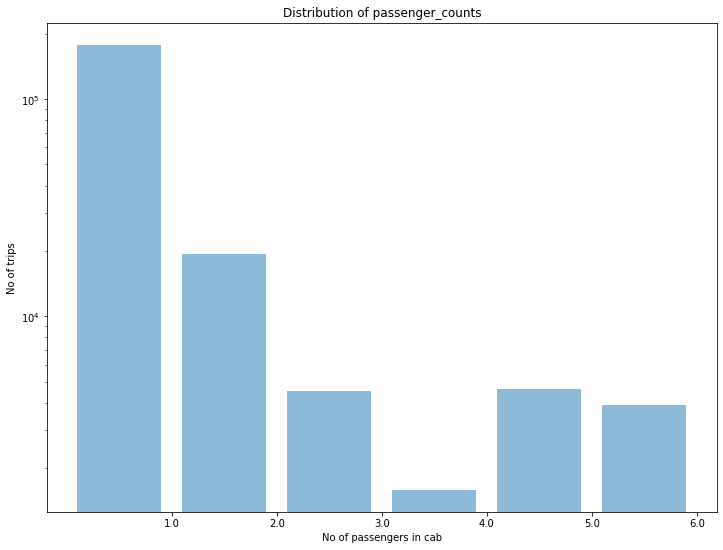

In [115]:
passenger_count = data['passenger_count'].value_counts().sort_index()
passenger_count_list_index = [index for index in passenger_count.index]
passenger_count_list_values =[passenger_count[index] for index in passenger_count.index]

no_of_types = range(len(passenger_count))
plt.xticks([x+0.5 for x in no_of_types],passenger_count_list_index) #Adding 0.5 to place the xticks at middle of bar
plt.bar(no_of_types,passenger_count_list_values, alpha=0.5) #Discrete variable, hence bar chart
plt.yscale('log')                                          #Adding log scale, as the values fluctuate widely
plt.ylabel('No of trips')
plt.xlabel('No of passengers in cab')
plt.title('Distribution of passenger_counts')
plt.savefig('trip_passenger_count_distribution.png')
plt.show()

In [ ]:
%%time
def haversine_np(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1,lat1,lon2,lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c=2*np.arcsin(np.sqrt(a))
    km=6367*c
    return km

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


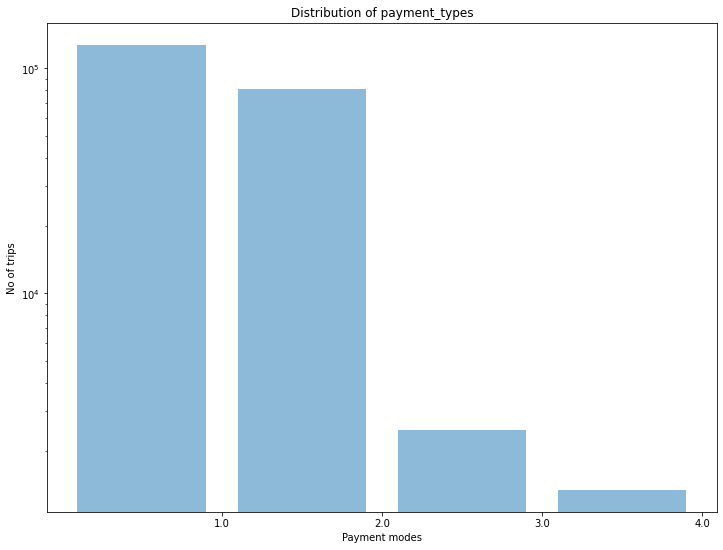

In [117]:
#Extracting frequency of mode of payment in a cab into 2 lists - index and respective counts
#Plotting the counts and setting the corresponding xticks as the index
payment_type = data['payment_type'].value_counts()
payment_type_list_index = [index for index in payment_type.index]
payment_type_list_values =[payment_type[index] for index in payment_type.index]
no_of_types = range(len(payment_type))   
plt.xticks([x+0.5 for x in no_of_types],payment_type_list_index) #Adding 0.5 to place the xticks at middle of bar
plt.bar(no_of_types,payment_type_list_values, alpha=0.5) # Discrete variable, hence bar chart
plt.yscale('log')
plt.ylabel('No of trips')
plt.xlabel('Payment modes')
plt.title('Distribution of payment_types')
plt.savefig('fare_payment_type_distribution.png')
plt.show()

#Plot the histogram of fare amount frequqncy with min and max values as limit
#Continuous variable , hence a histogram being plotted

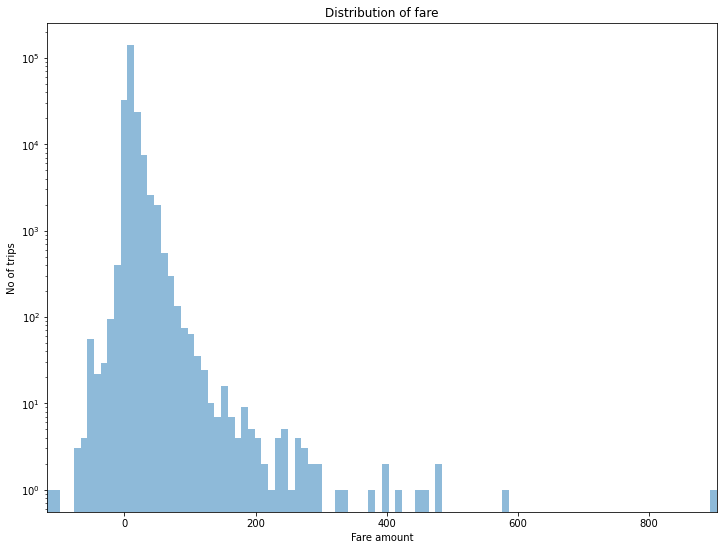

In [119]:
plt.hist(data['fare_amount'],alpha =0.5, bins = 100)
plt.xlim([data['fare_amount'].min(),data['fare_amount'].max()])
plt.yscale('log')           #log as the values were ranging across large range
plt.ylabel('No of trips')
plt.xlabel('Fare amount')
plt.title('Distribution of fare')
plt.savefig('fare_amount_distribution.png')
plt.show()

#Plot the histogram of tip amount frequqncy with min and max values as limit
#Continuous variable , hence a histogram being plotted

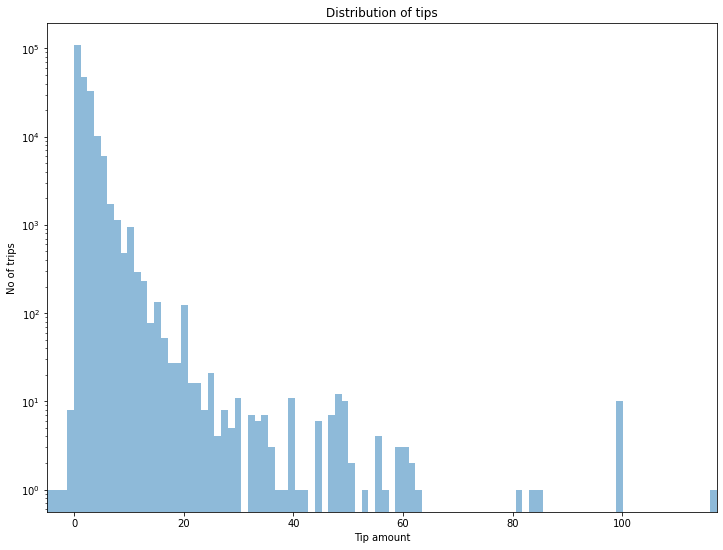

In [121]:
plt.hist(data['tip_amount'],alpha =0.5, bins = 100)
plt.xlim([data['tip_amount'].min(),data['tip_amount'].max()])
plt.yscale('log')
plt.ylabel('No of trips')
plt.xlabel('Tip amount')
plt.title('Distribution of tips')
plt.savefig('tip_amount_distribution.png')
plt.show()

#Plot the histogram of total amount frequqncy with min and max values as limit
#Continuous variable , hence a histogram being plotted


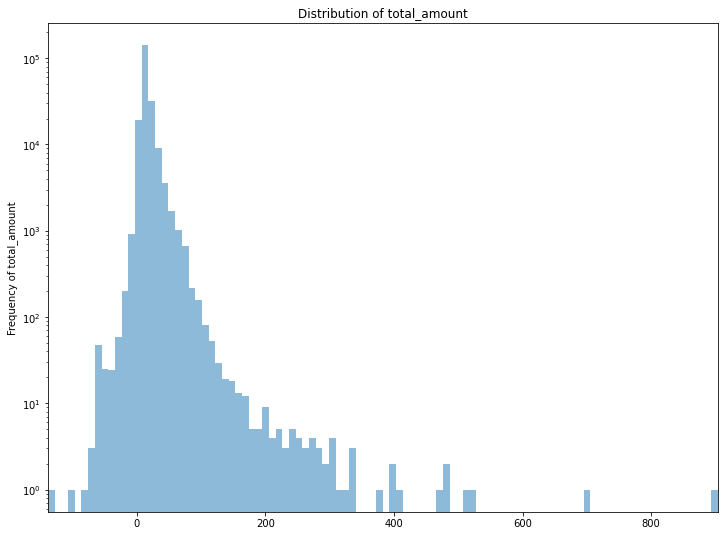

In [122]:
plt.hist(data['total_amount'],alpha =0.5, bins = 100)
plt.xlim([data['total_amount'].min(),data['total_amount'].max()])
plt.yscale('log')
plt.ylabel('Frequency of total_amount')
plt.title('Distribution of total_amount')
plt.savefig(' total_amount_distribution.png')
plt.show()

#Assumption: Busiest hour would imply both pickups and dropoffs are highest
#First generating pickup and dropoff hours based on timestamp and then generating frequency of pickup & dropof
#Discrete variable , hence a bar chart being plotted

In [ ]:
trip = pd.read_pickle('ultimate_datset.pkl')
trip['pickup_day'].value_counts().plot.bar(alpha=0.5)
plt.savefig('day_of_month_dist.png')
plt.show()

#Choosing Monday, though the inherent bias is evident as the Mondays
#seems to have the lowest pickups in the entire month
trip_1=trip[trip['pickup_day']==1]
trip_1.to_pickle('trip_1.pkl')

In [ ]:
data['haversine_dist']= haversine_np(data.pickup_longitude, data.pickup_latitude, data.dropoff_longitude, data.dropoff_latitude).astype(np.float32)

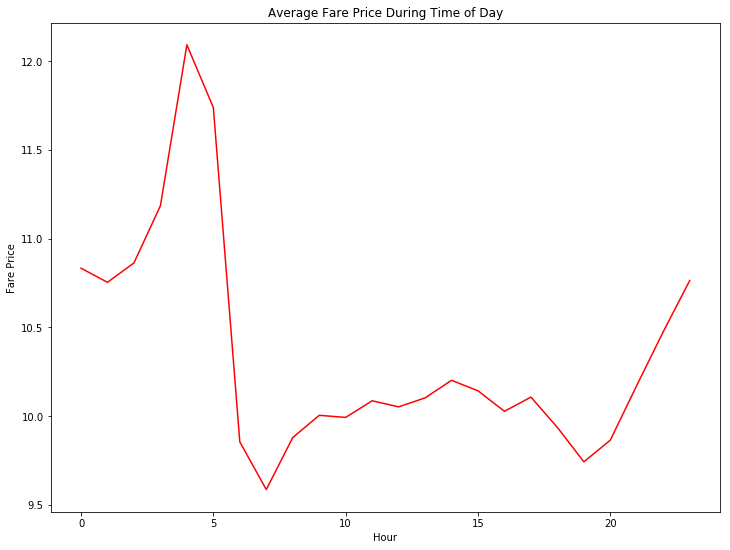

In [ ]:
time_of_day = data.groupby(['hour']).mean()

plt.plot(time_of_day.index, time_of_day.fare_amount, color = 'r')

plt.xlabel('Hour')
plt.ylabel('Fare Price')
plt.title('Average Fare Price During Time of Day')
plt.show()

# Interesting Insight

This will not be part of my machine learning algorithm, but it does give me some interesting news about the taxi fares from 2009 to 2015. I wanted to see the trend of taxi prices over a time series plot. So I created a copy of my clean dataset and engineered my new dataset to have the correct features to for a time series analysis.

In [ ]:
taxi = data.sort_values(by='key').reset_index()

In [ ]:
year = taxi['key'].dt.year.astype(str)
month = taxi['key'].dt.month.astype(str)
day = taxi['key'].dt.day.astype(str)

In [ ]:
date = year+"-"+month+"-"+day
date = pd.to_datetime(date)
year_month = year +'-'+month
year_month = pd.to_datetime(year_month)
taxi['year_month'] = year_month
taxi['date'] = date

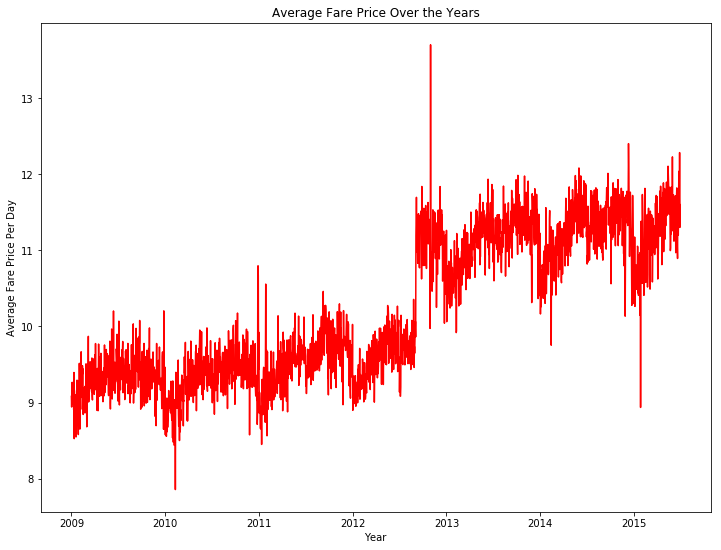

In [ ]:
taxi_rate = taxi.groupby(['date']).mean()

plt.plot(taxi_rate.index, taxi_rate.fare_amount, color = 'r')

plt.xlabel('Year')
plt.ylabel('Average Fare Price Per Day')
plt.title('Average Fare Price Over the Years')
plt.show()

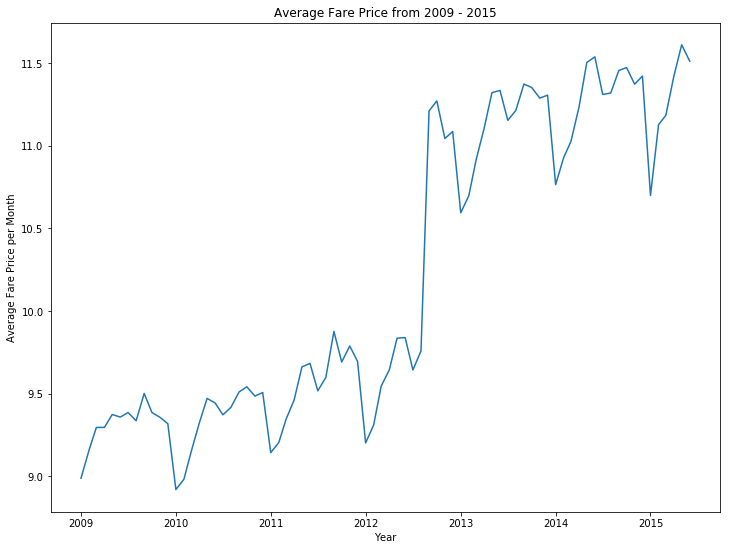

In [ ]:
taxi_month = taxi.groupby(['year_month']).mean()

plt.plot(taxi_month.index, taxi_month.fare_amount)

plt.xlabel('Year')
plt.ylabel('Average Fare Price per Month')
plt.title('Average Fare Price from 2009 - 2015')
plt.show()

In [ ]:
year2012 = taxi[(taxi['year_month']>='2012-01-01') & (taxi['year_month']<='2013-01-01')]

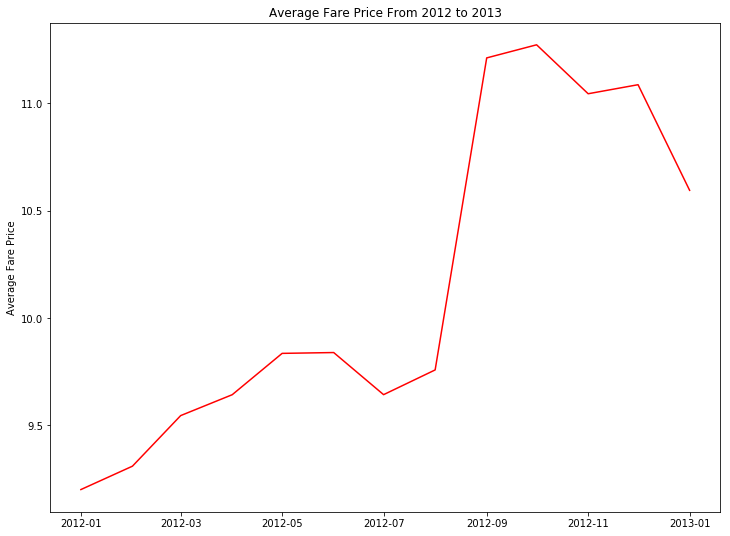

In [ ]:
year2012 = year2012.groupby(['year_month']).mean()

plt.plot(year2012.index, year2012.fare_amount, color = 'r')

plt.ylabel('Average Fare Price')
plt.title('Average Fare Price From 2012 to 2013')
plt.show()

In [ ]:
# Somthing super interesting to note, NY cabs raised their prices by 20%
# https://www.nytimes.com/2012/09/04/nyregion/new-york-taxis-to-start-charging-increased-rates.html

In [ ]:
ml = data[:100000]

# Machine Learning Section

In [ ]:
from  sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression 
import xgboost as xgb

In [ ]:
y = ml['fare_amount']

In [ ]:
X = ml.drop(['fare_amount','key', 'pickup_datetime'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.020128872367303985
0.022218080048257538


In [ ]:
y_pred = lm.predict(X_test)
lrmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
lrmse

6.308805959070073

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(random_state=42)
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
randomForestPredict = randomForest.predict(X_test)
randomForest_mse = mean_squared_error(y_test, randomForestPredict)
randomForestMSE = np.sqrt(randomForest_mse)
randomForestMSE

2.604663917648494

In [ ]:
model = RandomForestRegressor(n_estimators=25, max_features=6, max_depth=25, min_samples_split=3,
                              min_samples_leaf=2, random_state=0)

In [ ]:
randomForestImproved = model.fit(X_train,y_train)

In [ ]:
randomForestImprovedPredict = randomForestImproved.predict(X_test)
randomForestImproved_mse = mean_squared_error(y_test, randomForestImprovedPredict)
randomForestImprovedMSE = np.sqrt(randomForestImproved_mse)
randomForestImprovedMSE

2.4618640281983994

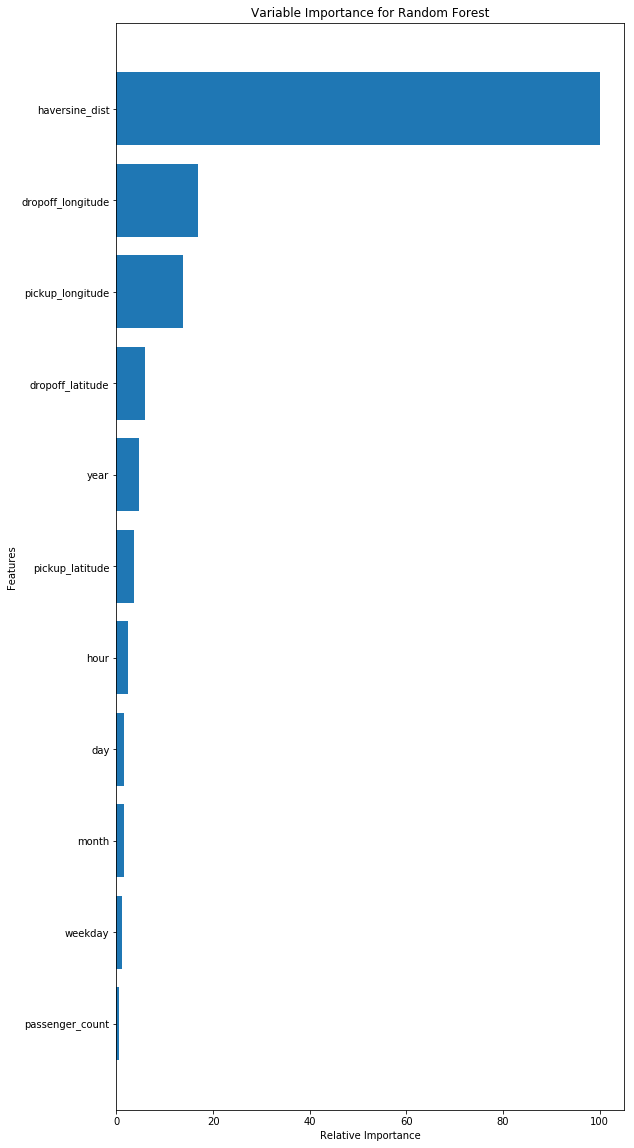

In [ ]:
feature_importance = randomForestImproved.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx]) 
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Variable Importance for Random Forest')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gradient= GradientBoostingRegressor(n_estimators=100, learning_rate=1, max_depth=3, random_state=0)
gradientBoost = model_gradient.fit(X_train, y_train)

In [ ]:
predicted = model_gradient.predict(X_test)

In [ ]:
grmse = np.sqrt(metrics.mean_squared_error(predicted, y_test))
grmse

2.595016287623656

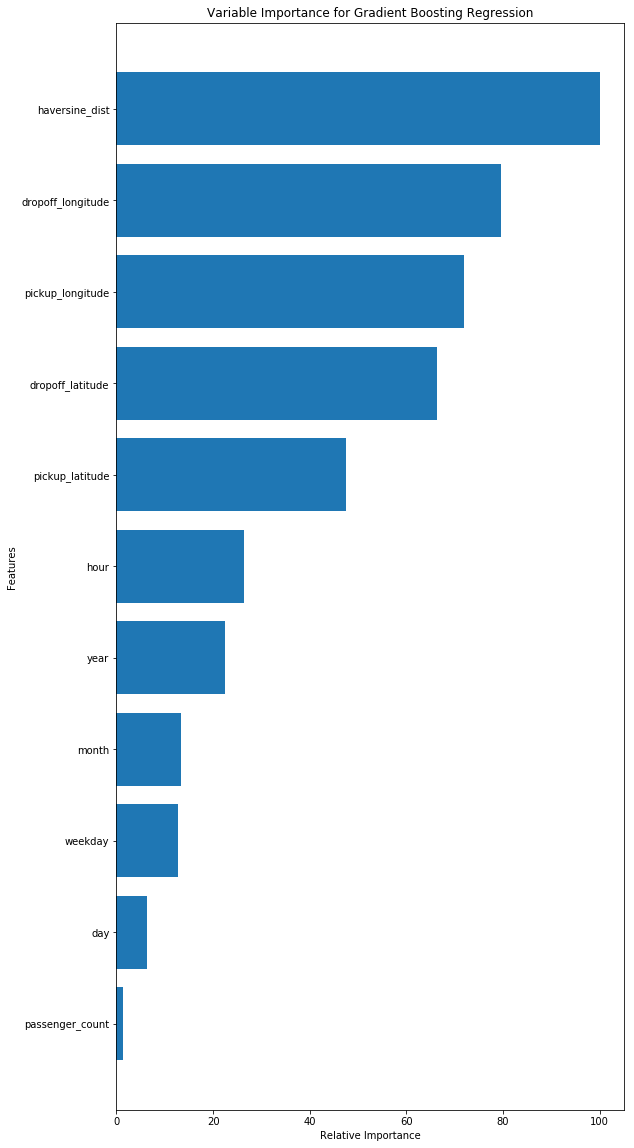

In [ ]:
feature_importance = gradientBoost.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx]) 
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Variable Importance for Gradient Boosting Regression')
plt.show()

In [ ]:
regression = pd.DataFrame({"regression": ['Multi Linear Regression','Random Forest', 'Improved Random Forest', 'Gradient Boosting Regrssion'], "rmse": [lrmse,randomForestMSE,randomForestImprovedMSE,grmse]},columns = ['regression','rmse'])

In [ ]:
regression = regression.sort_values(by='rmse', ascending = False)

Text(0.5,1,'Comparing the different types of Regressions used')

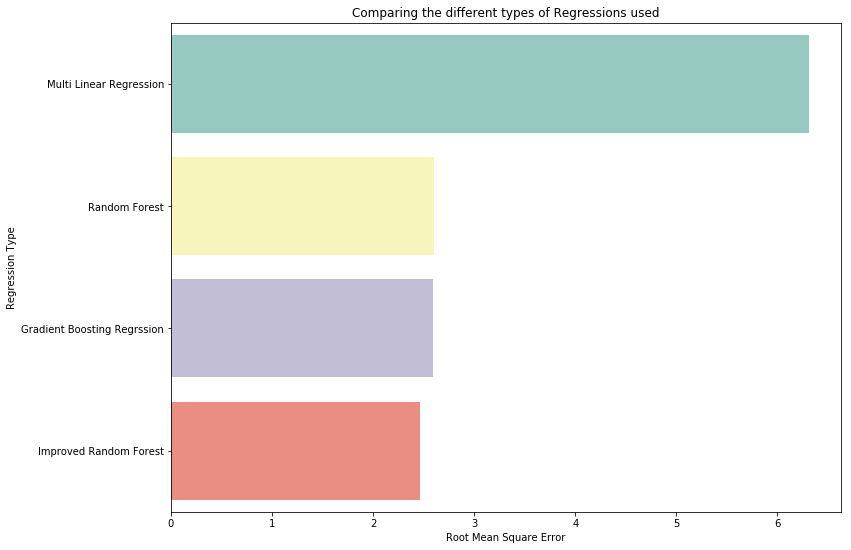

In [ ]:
sns.barplot(regression['rmse'], regression['regression'], palette = 'Set3')
plt.xlabel("Root Mean Square Error")
plt.ylabel('Regression Type')
plt.title('Comparing the different types of Regressions used')

### Test 

Now that I've ran my model, I need to run my test.csv through the same feature enginneering that I did on my training.csv. Once I've finished 

In [ ]:
test = pd.read_csv('./Desktop/taxi/test.csv')

In [ ]:
date_columns(test)

In [ ]:
test['haversine_dist']= haversine_np(test.pickup_longitude, test.pickup_latitude, test.dropoff_longitude, test.dropoff_latitude).astype(np.float32)

In [ ]:
testing = test.drop(['key','pickup_datetime'], axis = 1)

In [ ]:
key = test['key']

In [ ]:
submission = pd.DataFrame({"key": test['key'], "fare_amount": predicted},columns = ['key','fare_amount'])

In [ ]:
submission.to_csv('./Desktop/submission.csv', index = False)